In [38]:
import numpy as np
import cv2

def image_formation_model( f, x0, y0, sigma ):
	g = f.copy( )
	nr, nc = f.shape[:2]
	illumination = np.zeros( [ nr, nc ], dtype = 'float32' )
	for x in range( nr ):
		for y in range( nc ):
			illumination[x,y] = np.exp( -( ( x - x0 ) ** 2 + ( y - y0 ) ** 2 ) / 
 								( 2 * sigma * sigma ) )
	for x in range( nr ):
		for y in range( nc ):
			for k in range( 3 ):
				val = round( illumination[x,y] * f[x,y,k] )
				g[x,y,k] = np.uint8( val )
	return g
	
def main( ):
	img = cv2.imread( "Monet.bmp", -1 )
	nr, nc = img.shape[:2]
	x0 = nr // 2
	y0 = nc // 2
	sigma = 400
	img2 = image_formation_model( img, x0, y0, sigma )
	#cv2.imshow( "Original Image", img )
	cv2.imshow( "Image Formation Model", img2 )
	cv2.waitKey( 0 )
    #cv2.destroyAllWindows()

main( )

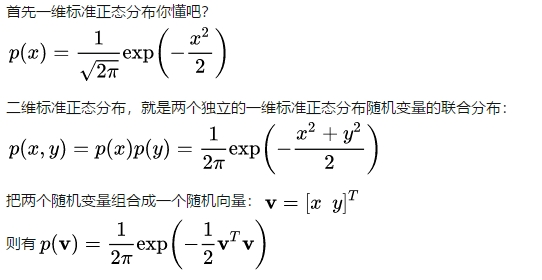

In [52]:
#ex_CH03_1
import cv2
import numpy as np

# f is reflection obj , illumination=Gaussian fuc , => f x Gaussian @point(x0,y0)
def image_formation_model( f, x0, y0, sigma ):
	g = f.copy( )
	nr, nc = f.shape[:2]
	illumination = np.zeros( [ nr, nc ], dtype = 'float32' )
	for x in range( nr ):
		for y in range( nc ):
			illumination[x,y] = (1) * np.exp( -( ( x - x0 ) ** 2 + ( y - y0 ) ** 2 ) / ( 2 * sigma * sigma ) )
            #illumination[x,y] = np.exp( -( ( x - x0 ) ** 2 + ( y - y0 ) ** 2 ) / ( 2 * sigma * sigma ) )
	for x in range( nr ):
		for y in range( nc ):
			for k in range( 3 ):
				val = round( illumination[x,y] * f[x,y,k] )
				g[x,y,k] = np.uint8( val )
	return g


#img7 = np.zeros([100,512], dtype='uint8') #gray lv.
test_x = 512
test_y = 512
img7 = np.zeros([test_x,test_y,3], dtype='uint8')   
for i in range(test_x):
    for j in range(test_y):
        #img7[i][j]= int(j/2)    #gray lv
        #img7[i][j][2]= int(j/2)  
        img7[i][j][0]= 150
        img7[i][j][1]= 150
        img7[i][j][2]= 150
#-----------------------------------------------
#img7 = cv2.imread( "Monet.bmp", -1 )
nr, nc = img7.shape[:2]
x0 = nr // 2
y0 = nc // 2
sigma = 150

#higher reflection absorbing by object w/ darker color 
img37 = image_formation_model( img7, x0, y0, sigma )
cv2.imshow( "Original Image", img7 )
cv2.imshow( "Image Formation Model", img37 )        
        
        
        
#-----------------------------------------------        
#cv2.imshow("home1105",img7)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
#ex_CH03_2_downsampling
import numpy as np
import cv2
import itertools

s_rate = 2
f_sumx = 0
f_sumy = 0
f_sumxy = 0
def image_downsampling( f, sampling_rate ):
	nr, nc = f.shape[:2]
	nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
	g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
	for x in range( nr_s ):
		for y in range( nc_s ):                        
			g[x,y] = f[x * sampling_rate, y * sampling_rate]
	return g
	
    
def image_downsampling_ave( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
    g_ave = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
    for x in range( nr_s ):
        for y in range( nc_s ):
            f_sumxy = 0
            for s_r_x, s_r_y in itertools.product(range(sampling_rate),range(sampling_rate)):
                f_sumxy = f_sumxy + f[((x*sampling_rate)+s_r_x),((y*sampling_rate)+s_r_y)]
                                
            g_ave[x,y] = f_sumxy / (sampling_rate**2)
    return g_ave

def image_downsampling_up( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr*sampling_rate, nc*sampling_rate
    g_up = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
    for x in range( nr ):
        for y in range( nc ):
            f_sumxy = 0
            for s_r_x, s_r_y in itertools.product(range(sampling_rate),range(sampling_rate)):
                g_up[((x*sampling_rate)+s_r_x),((y*sampling_rate)+s_r_y)] = f[x,y]                
    return g_up

#def main( ):
img71 = cv2.imread( "barbara.bmp", -1 )
img72 = image_downsampling( img71, s_rate )
img73 = image_downsampling_ave( img71, s_rate )
img74 = image_downsampling_up( img71, s_rate )
cv2.imshow( "Original Image", img71 )
cv2.imshow( "Down_by %d" %(s_rate) , img72 )
cv2.imshow( "Ave_by %d" %(s_rate) , img73 )
cv2.imshow( "Up_by %d" %(s_rate) , img74 )
cv2.waitKey( 0 )

#main( )

   

cv2.destroyAllWindows()

In [75]:
import numpy as np
import cv2

filename = input( "Please enter filename: " )
img = cv2.imread( filename, -1 )
Rng_x, Rng_y = img.shape[:2]
print (str(Rng_x) +"--"+ str(Rng_y))

Please enter filename: barbara.bmp
512--512


In [103]:
import itertools

x= list(range(3))
y= list(range(100,103))
print (x)
print (y)
for i,j in itertools.product(x,x):
#for i,j in zip(x,y):
    print (i+j)



[0, 1, 2]
[100, 101, 102]
0
1
2
1
2
3
2
3
4


In [6]:
import numpy as np
import cv2

def image_quantization( f, bits ):
	g = f.copy( )
	nr, nc = f.shape[:2]
	levels = 2 ** bits
	interval = 256 / levels
	gray_level_interval = 255 / ( levels - 1 )
	table = np.zeros( 256 )
	for k in range( 256 ):
		for l in range( levels ):
			if k >= l * interval and l < ( l + 1 ) * interval:
				table[k] = round( l * gray_level_interval ) 
	for x in range( nr ):
		for y in range( nc ):
			g[x,y] = np.uint8( table[f[x,y]] )
	return g
	
#def main( ):
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = image_quantization( img1, 4 )
cv2.imshow( "Original Image", img1 )
cv2.imshow( "Quantization", img2 )
cv2.waitKey( 0 )

#main( )
cv2.destroyAllWindows()

In [4]:
a = np.zeros(8 , dtype='uint8')
b = np.zeros([8,8] , dtype='uint8')
print (a)
print (b)

[0 0 0 0 0 0 0 0]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [2]:
print ('mmmmjjjj')

mmmmjjjj
